# Plot downward longwave (LW) radiation at surface for WRF Simulations
WRF simulations serve as comparison to observations. Here the downward longwave radiation for the high black carbon loading event is considered. The results from the high dust event was difficult to interpret and is omitted. 

In [1]:
import xarray as xr
import cartopy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


Text(0.5, 1.0, 'Jan 25th - Control')

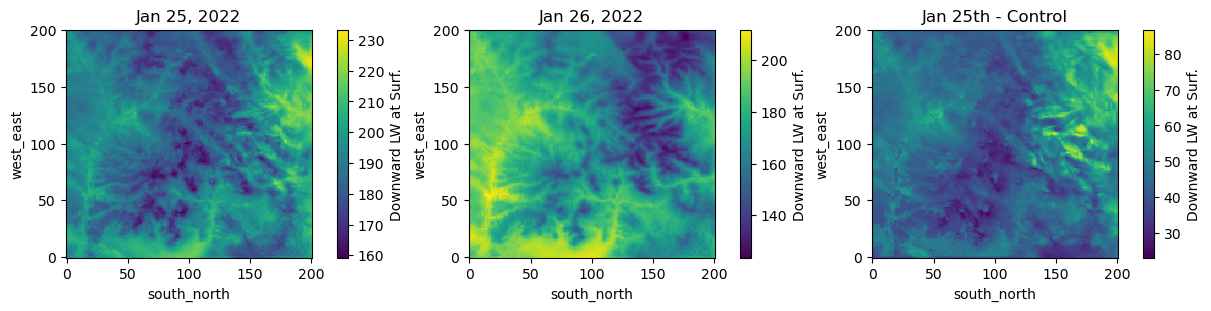

In [5]:
# Plot downward LW radiation at surface
# January 26th had no clouds so this day serves as comparison 
dataset_25 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-25.nc')
dataset_26 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-26.nc')
dataset_02 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-02.nc')
mean_dataset_diff = dataset_25.mean(dim="Time") - dataset_02.mean(dim="Time")

fig = plt.figure(figsize = (12,3),constrained_layout=True)

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
dataset_25.mean(dim="Time").GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax1.set_title('Jan 25, 2022')
ax2 = fig.add_subplot(gs[0, 1])
dataset_26.mean(dim="Time").GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax2.set_title('Jan 26, 2022')
ax3 = fig.add_subplot(gs[0, 2])
mean_dataset_diff.GLW.plot(x='south_north',y='west_east',cbar_kwargs={'label': r"Downward LW at Surf."})
ax3.set_title('Jan 25th - Control')

Text(0.5, 1.0, 'time series of LWR')

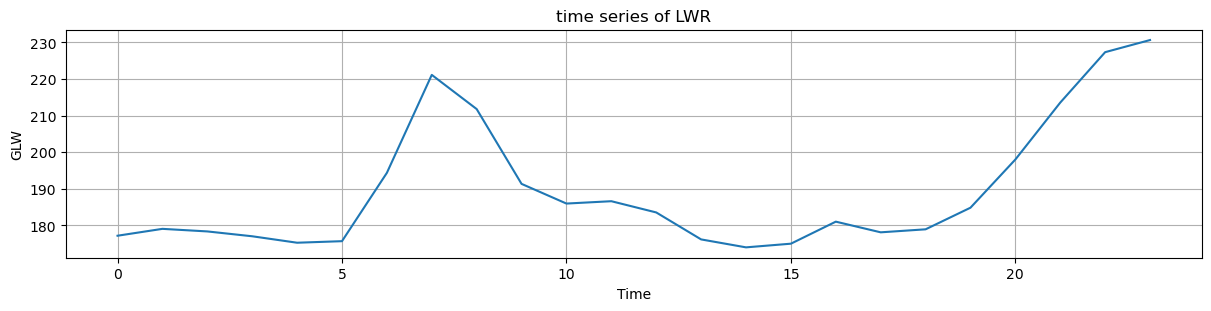

In [13]:
# plot time series of downward LW radiation for Jan 25 
dataset_25 = xr.open_mfdataset('wrf_data/jan_2022/wrfhourly_d03_2022-01-25.nc')
time_series = dataset_25.mean(dim="south_north")
time_series = time_series.mean(dim="west_east")
fig = plt.figure(figsize = (12,3),constrained_layout=True)
time_series.GLW.plot()
plt.grid()
plt.title('time series of LWR')